# World Happiness Report Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle # Machine Learning model is stored in pickle
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
import warnings
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')

C:\Users\Dell\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [3]:
Happiness=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
Happiness

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [63]:
Happiness.columns=['Country','Region', 'Happiness_Rank', 'Happiness_Score', 
                   'Standard_Error', 'economy', 'Family', 'Health', 'Freedom',
                   'Trust', 'Generosity','Dystopia_Residual']

In [64]:
Happiness

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [35]:
sns.set_style('darkgrid')
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=(10,7)
plt.rcParams['figure.facecolor']= '#FFE5B4'

In [37]:
Happiness.isnull().sum()

Country              0
Region               0
Happiness_Rank       0
Happiness_Score      0
Standard_Error       0
economy              0
Family               0
Health               0
Freedom              0
Trust                0
Generosity           0
Dystopia Residual    0
dtype: int64

Text(0, 0.5, 'GDP Per Capita')

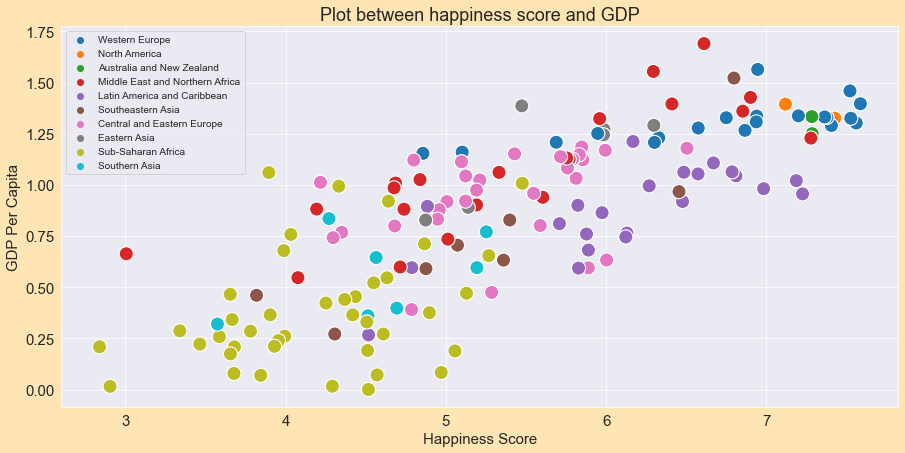

In [40]:
# Plot between happiness and GDP
plt.rcParams['figure.figsize']=[15,7]
plt.title('Plot between happiness score and GDP')
sns.scatterplot(x=Happiness.Happiness_Score, y=Happiness.economy, hue=Happiness.Region, s=200);

plt.legend(loc='upper left', fontsize='10')
plt.xlabel('Happiness Score')
plt.ylabel('GDP Per Capita')

In [42]:
# GDP VS REGION PYPLOT
gdp_region= Happiness.groupby('Region')['economy'].sum()
gdp_region

Region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: economy, dtype: float64

Text(0, 0.5, '')

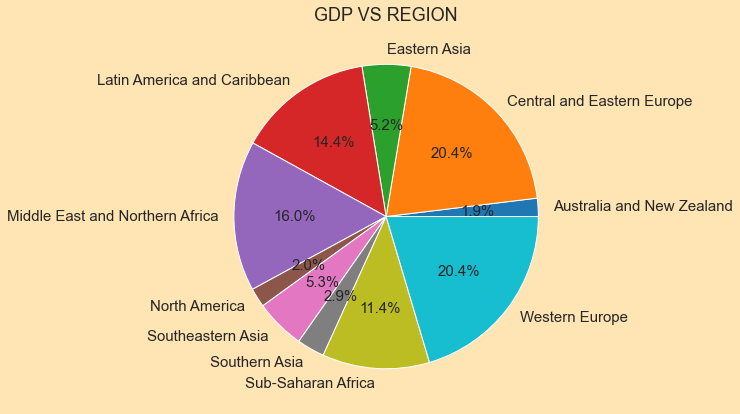

In [43]:
gdp_region.plot.pie(autopct='%1.1f%%')
plt.title('GDP VS REGION')
plt.ylabel('')

In [46]:
# Total number of countires in each region
total_country= Happiness.groupby('Region')[['Country']].count()
print(total_country)

                                 Country
Region                                  
Australia and New Zealand              2
Central and Eastern Europe            29
Eastern Asia                           6
Latin America and Caribbean           22
Middle East and Northern Africa       20
North America                          2
Southeastern Asia                      9
Southern Asia                          7
Sub-Saharan Africa                    40
Western Europe                        21


<AxesSubplot:>

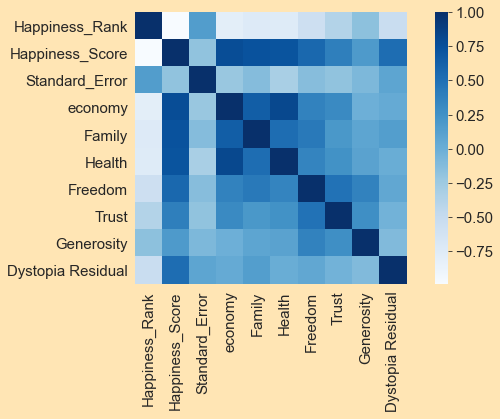

In [49]:
# finding correlation matrix
cor=Happiness.corr(method="pearson")
f,ax=plt.subplots(figsize=(10,5))
sns.heatmap(cor,mask=np.zeros_like(cor),
            cmap="Blues",square=True, ax=ax)

In [50]:
# plotting barplot to check corruptions in various regions
corruption=Happiness.groupby('Region')[['Trust']].mean()
print(corruption)

                                    Trust
Region                                   
Australia and New Zealand        0.392795
Central and Eastern Europe       0.086674
Eastern Asia                     0.127695
Latin America and Caribbean      0.117172
Middle East and Northern Africa  0.181702
North America                    0.244235
Southeastern Asia                0.151276
Southern Asia                    0.102536
Sub-Saharan Africa               0.123878
Western Europe                   0.231463


<BarContainer object of 10 artists>

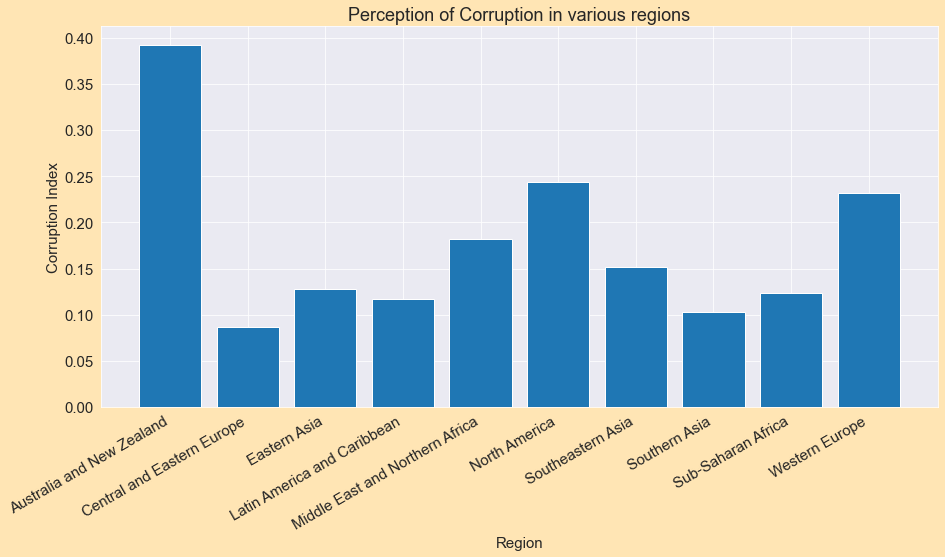

In [51]:
plt.rcParams['figure.figsize']=[15,7]
plt.title('Perception of Corruption in various regions')
plt.xlabel('Region', fontsize=15)
plt.ylabel('Corruption Index', fontsize=15)
plt.xticks(rotation=30, ha='right')
plt.bar(corruption.index, corruption.Trust)

In [53]:
# life expectancy of Top 10 countries and bottom 10 countries
top_10=Happiness.head(10)
print(top_10)
bottom_10=Happiness.tail(10)
print(bottom_10)


       Country                     Region  Happiness_Rank  Happiness_Score  \
0  Switzerland             Western Europe               1            7.587   
1      Iceland             Western Europe               2            7.561   
2      Denmark             Western Europe               3            7.527   
3       Norway             Western Europe               4            7.522   
4       Canada              North America               5            7.427   
5      Finland             Western Europe               6            7.406   
6  Netherlands             Western Europe               7            7.378   
7       Sweden             Western Europe               8            7.364   
8  New Zealand  Australia and New Zealand               9            7.286   
9    Australia  Australia and New Zealand              10            7.284   

   Standard_Error  economy   Family   Health  Freedom    Trust  Generosity  \
0         0.03411  1.39651  1.34951  0.94143  0.66557  0.41978 

Text(599.1068181818181, 0.5, 'Life Expectancy')

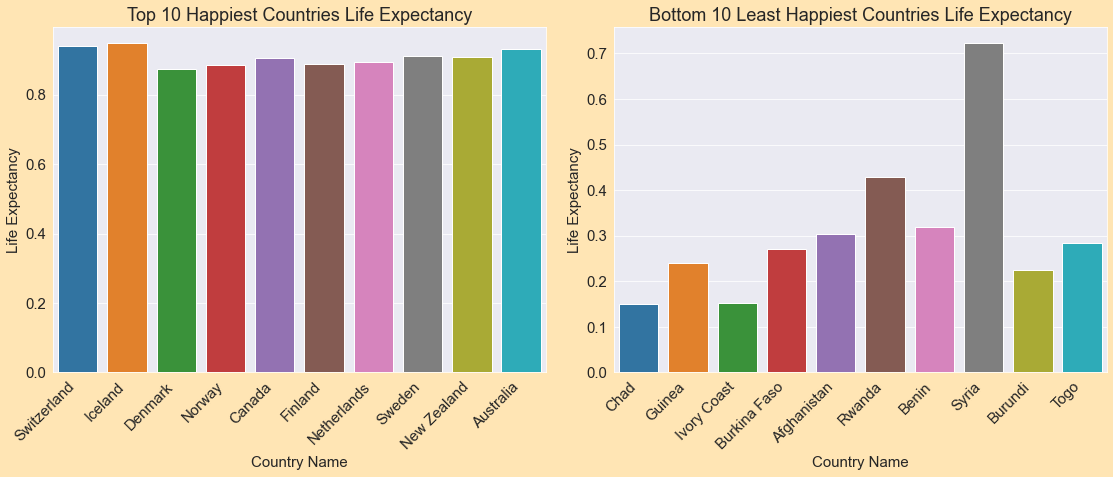

In [56]:
fig,axes=plt.subplots(1,2, figsize=(16,6))
plt.tight_layout(pad=2)
xlabels=top_10.Country
axes[0].set_title('Top 10 Happiest Countries Life Expectancy')
axes[0].set_xticklabels(xlabels, rotation=45, ha='right')
sns.barplot(x=top_10.Country, y=top_10.Health, ax=axes[0])
axes[0].set_xlabel('Country Name')
axes[0].set_ylabel('Life Expectancy')

xlabels=bottom_10.Country
axes[1].set_title('Bottom 10 Least Happiest Countries Life Expectancy')
axes[1].set_xticklabels(xlabels, rotation=45, ha='right')
sns.barplot(x=bottom_10.Country, y=bottom_10.Health, ax=axes[1])
axes[1].set_xlabel('Country Name')
axes[1].set_ylabel('Life Expectancy')





Text(0, 0.5, 'Happiness Score')

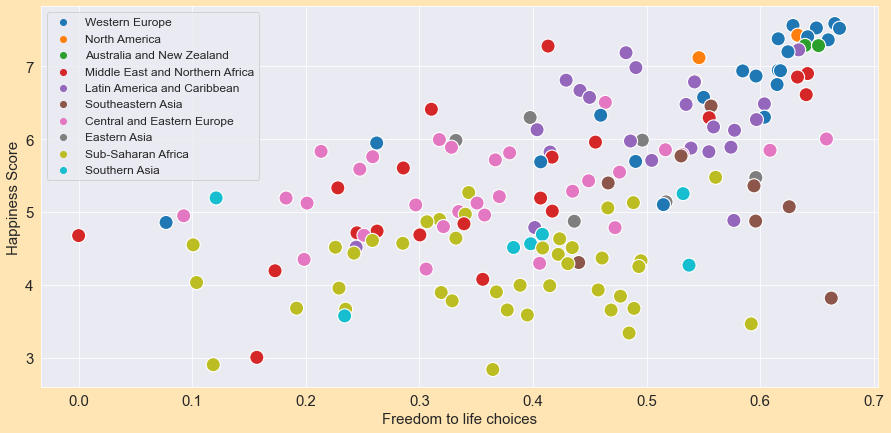

In [57]:
# Freedom choices
plt.rcParams['figure.figsize']=[15,7]
sns.scatterplot(x=Happiness.Freedom, y=Happiness.Happiness_Score, hue=Happiness.Region, s=200)
plt.legend(loc='upper left', fontsize='12')
plt.xlabel('Freedom to life choices')
plt.ylabel('Happiness Score')

<BarContainer object of 10 artists>

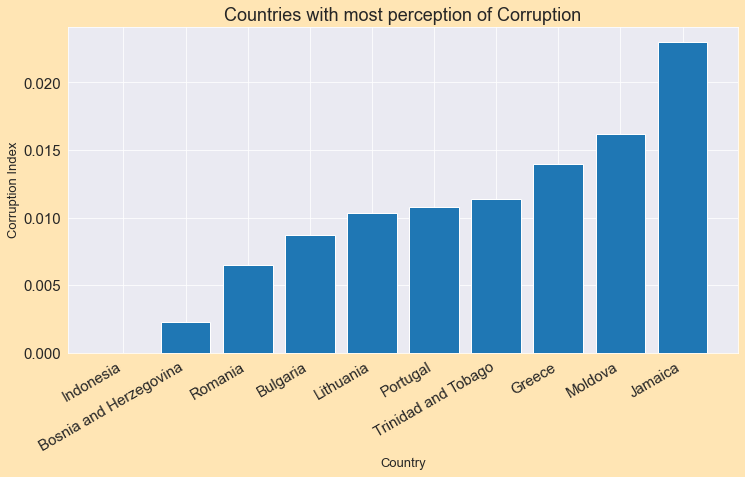

In [58]:
# Top 10 most corrupt countries
Countries=Happiness.sort_values(by='Trust').head(10)
plt.rcParams['figure.figsize']=(12,6)
plt.title('Countries with most perception of Corruption')
plt.xlabel('Country', fontsize=13)
plt.ylabel('Corruption Index', fontsize=13)
plt.xticks(rotation=30, ha='right')
plt.bar(Countries.Country, Countries.Trust)

<BarContainer object of 10 artists>

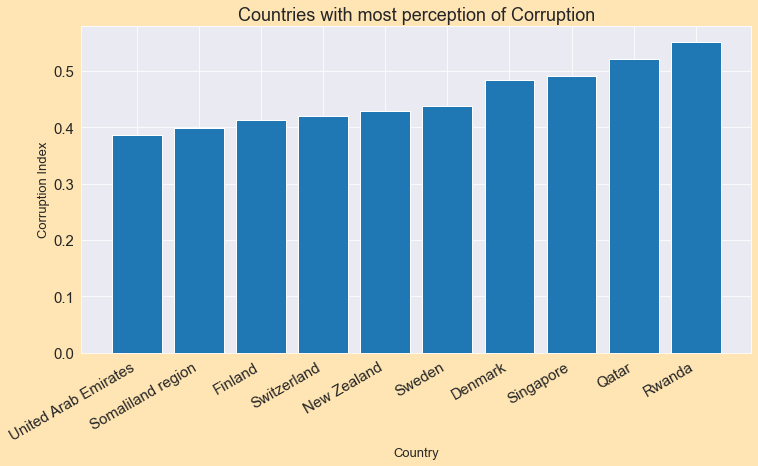

In [59]:
# Top 10 least corrupt countries
Countries=Happiness.sort_values(by='Trust').tail(10)
plt.rcParams['figure.figsize']=(12,6)
plt.title('Countries with most perception of Corruption')
plt.xlabel('Country', fontsize=13)
plt.ylabel('Corruption Index', fontsize=13)
plt.xticks(rotation=30, ha='right')
plt.bar(Countries.Country, Countries.Trust)

Text(0, 0.5, 'Corruption')

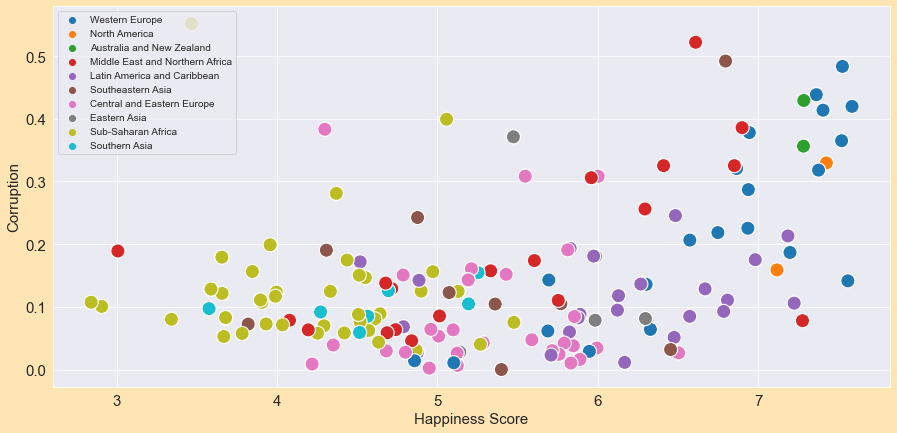

In [72]:
# plotting scatterplot in terms of corruption varies with happiness score
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=Happiness.Happiness_Score, y=Happiness.Trust, hue=Happiness.Region, s=200)
plt.legend(loc='upper left', fontsize= '10')
plt.xlabel('Happiness Score')
plt.ylabel('Corruption')

Text(0, 0.5, 'Generosity')

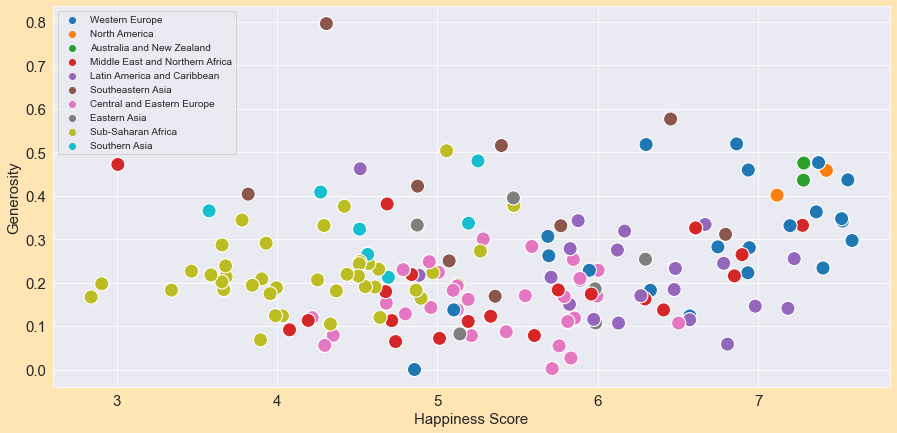

In [67]:
# plotting scatterplot in terms of Generosity varies with happiness score
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=Happiness.Happiness_Score, y=Happiness.Generosity, hue=Happiness.Region, s=200)
plt.legend(loc='upper left', fontsize= '10')
plt.xlabel('Happiness Score')
plt.ylabel('Generosity')

Text(0, 0.5, 'Dystopia_Residual')

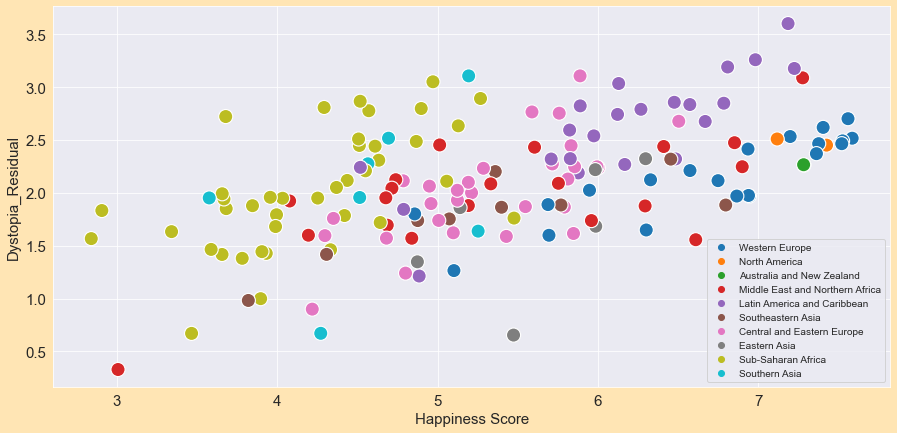

In [70]:
# plotting scatterplot in terms of Generosity varies with happiness score
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=Happiness.Happiness_Score, y=Happiness.Dystopia_Residual, hue=Happiness.Region, s=200)
plt.legend(loc='lower right', fontsize= '10')
plt.xlabel('Happiness Score')
plt.ylabel('Dystopia_Residual')